### Import Libraries

In [126]:
import sys

sys.path.append('..')
# sys.path.insert(0, '..')

In [127]:
import utils.data
import utils.trans
import utils.extract

In [128]:
from importlib import reload

In [129]:
reload(utils.data)
reload(utils.trans)
reload(utils.extract)

<module 'utils.extract' from '..\\utils\\extract.py'>

In [130]:
# import utils.record

# utils.record.run()

### Load Data

In [131]:
import librosa

In [132]:
# file_dir = "..\\..\\audio data science\\audio_datasets\\nsynth\\data_wave\\train"
# file_name = "brass_acoustic_016-083-075.wav"
# file_path = file_dir + "\\" + file_name

In [133]:
file_dir = "..\\data\\vocalis_recordings_examples\\wav"
file_name = "hm-013F15C00379D31182BAE62231EE565C.wav"
file_path = file_dir + "\\" + file_name

In [134]:
# file_path = 'record.wav'
file_path = file_name

In [135]:
file_path

'hm-013F15C00379D31182BAE62231EE565C.wav'

In [136]:
x = {}

In [137]:
x['wave'] = utils.data.load_wave(file_path)

### View Example

In [140]:
x['stft'] = utils.extract.apply(x['wave']['s'], 
    func=utils.trans.wave_to_stft, 
    func_params=utils.extract.params['stft'])

x['mel'] = utils.extract.apply(x['wave']['s'], 
    func=utils.trans.wave_to_mel, 
    func_params=utils.extract.params['mel'])

In [141]:
print('x' + ':')
for out_key in x.keys():
    print('--' + out_key + ':')
    for in_key in x[out_key].keys():
        print('  --' + in_key)

x:
--wave:
  --s
  --t
--stft:
  --s
  --f
  --t
--mel:
  --s
  --f
  --t


### View Example

In [142]:
import matplotlib.pyplot as plt
import numpy as np

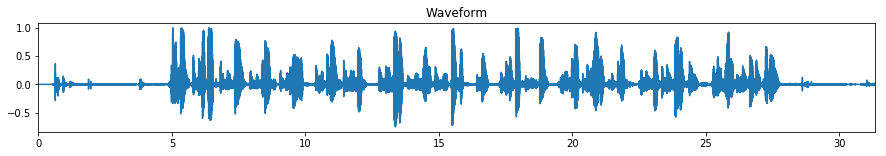

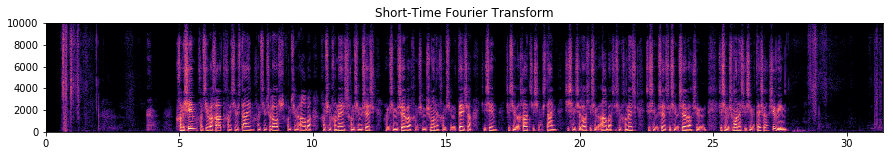

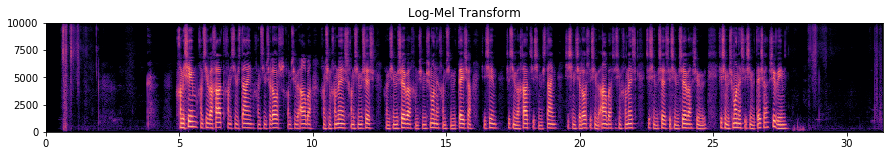

In [152]:
# plot:

# 
figsize = (15, 2)
cmap_spec = 'magma'

# sound wave:
display(Audio(x['wave']['s'], rate=utils.extract.f_s))

# display wave:
plt.figure(figsize=figsize)
plt.plot(x['wave']['t'], x['wave']['s'])
plt.xlim(x['wave']['t'][[0, -1]])
plt.title('Waveform')
plt.show()

# display stft:
plt.figure(figsize=figsize)
extent = np.concatenate([x['stft']['t'][[0, -1]], x['stft']['f'][[0, -1]]])
plt.imshow(x['stft']['s'], origin='lower', aspect='auto', cmap=cmap_spec, extent=extent)
plt.ylim([0, 10000])
plt.title('Short-Time Fourier Transform')
plt.show()

# display mel:
plt.figure(figsize=figsize)
extent = np.concatenate([x['mel']['t'][[0, -1]], x['mel']['f'][[0, -1]]])
plt.imshow(x['mel']['s'], origin='lower', aspect='auto', cmap=cmap_spec, extent=extent)
# plt.ylim([0, 5000])
plt.title('Log-Mel Transform')
plt.show()

In [104]:
x_wave = 

In [105]:
from IPython.display import Audio

#### Time Domain: Raw Waveform

In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x_wave_example = x_wave
sample_rate = f_s

In [29]:
# parameters:

n_fft = 1024 # frame length

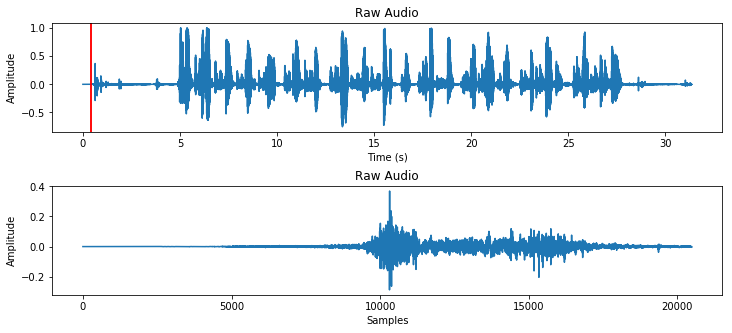

In [30]:
timesteps = np.arange(len(x_wave_example))/sample_rate

fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

ax[0].plot(timesteps, x_wave_example)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio')

start = 20000
stop = start+20*n_fft
x = x_wave_example[start:stop]

ax[0].axvline(start/sample_rate, c='r') 
ax[0].axvline((start+n_fft)/sample_rate, c='r')

ax[1].plot(x)
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Raw Audio');

#### Frequency Domain: Short-Time Fourier Transform

#### Frequency Domain: Log-Mel Spectrogram

In [65]:
# parameters:

n_fft = 4096
hop_length = 512

fmin = 0
fmax = 10000
n_mels = int(6*64)

In [73]:
reload(utils.trans)

<module 'utils.trans' from '..\\utils\\trans.py'>

In [75]:
x_mel_example = utils.trans.wave_to_mel(x['wave']['s'], **utils.extract.params['mel'])